In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()
df = pd.read_csv("../Iris.csv")

In [21]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df = df.iloc[:,1:]

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:
df['Species'] = encoder.fit_transform(df['Species'])

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [29]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

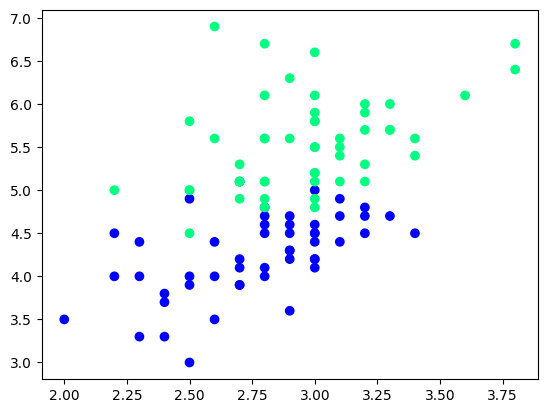

In [31]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [32]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
62,2.2,4.0,1
103,2.9,5.6,2
65,3.1,4.4,1
90,2.6,4.4,1
68,2.2,4.5,1
78,2.9,4.5,1
81,2.4,3.7,1
95,3.0,4.2,1
61,3.0,4.2,1


In [33]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [34]:
df_train

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
63,2.9,4.7,1
65,3.1,4.4,1
143,3.2,5.9,2
136,3.4,5.6,2
102,3.0,5.9,2
142,2.7,5.1,2
111,2.7,5.3,2
114,2.8,5.1,2
127,3.0,4.9,2


In [35]:
df_val

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
94,2.7,4.2,1
83,2.7,5.1,1
109,3.6,6.1,2
93,2.3,3.3,1


In [36]:
df_test

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
104,3.0,5.8,2
56,3.3,4.7,1
130,2.8,6.1,2
92,2.6,4.0,1


In [37]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [38]:
y_test

array([2, 1, 1, 2, 1])

# Case 1 - Bagging

In [39]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
102,3.0,5.9,2
127,3.0,4.9,2
127,3.0,4.9,2
63,2.9,4.7,1
63,2.9,4.7,1
127,3.0,4.9,2
128,2.8,5.6,2
143,3.2,5.9,2


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [45]:
dt_bag1 = DecisionTreeClassifier()

In [46]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

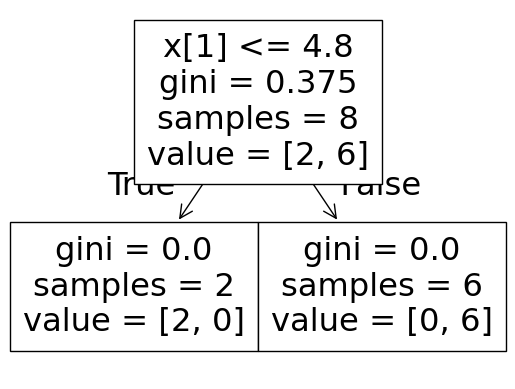

/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


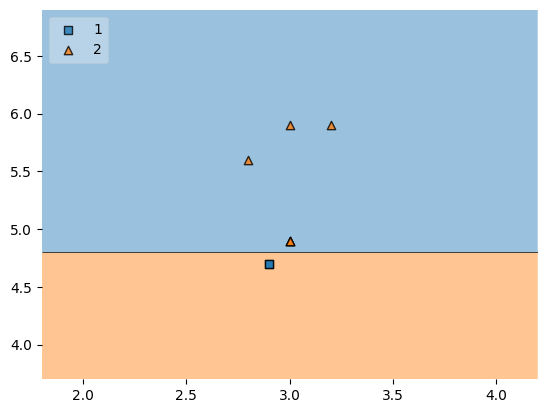

In [47]:
evaluate(dt_bag1,X,y)

In [49]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
127,3.0,4.9,2
63,2.9,4.7,1
65,3.1,4.4,1
136,3.4,5.6,2
63,2.9,4.7,1
102,3.0,5.9,2
143,3.2,5.9,2


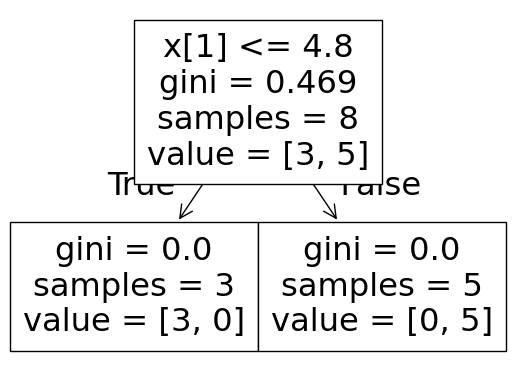

/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


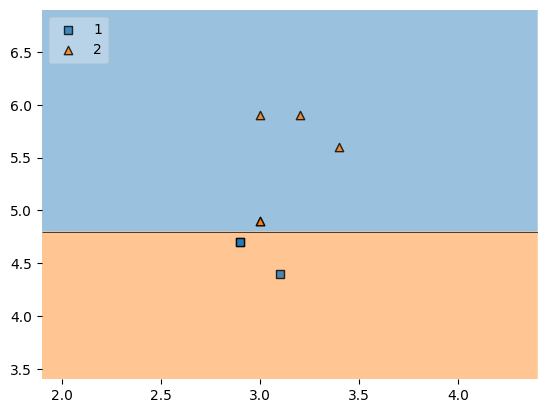

In [50]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [54]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
142,2.7,5.1,2
111,2.7,5.3,2
65,3.1,4.4,1
65,3.1,4.4,1
111,2.7,5.3,2
128,2.8,5.6,2
65,3.1,4.4,1
128,2.8,5.6,2


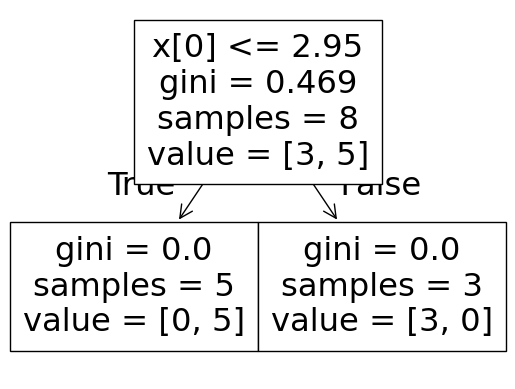

/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0


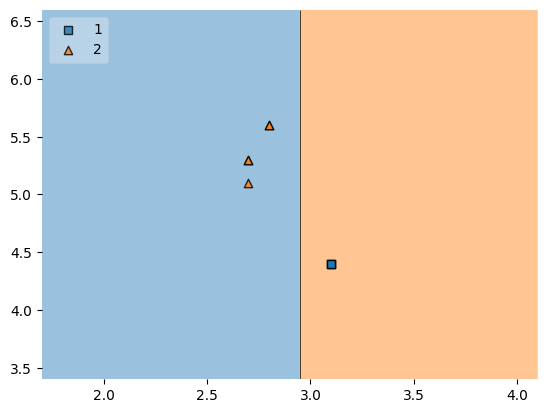

In [55]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
88,3.0,4.1,1
124,3.3,5.7,2
119,2.2,5.0,2
72,2.5,4.9,1


In [56]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/devesh/code_with_devesh/machine-learning/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [57]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
63,2.9,4.7,1
65,3.1,4.4,1
143,3.2,5.9,2
136,3.4,5.6,2
102,3.0,5.9,2
142,2.7,5.1,2
111,2.7,5.3,2
114,2.8,5.1,2
127,3.0,4.9,2


In [58]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
52,3.1,4.9,1
122,2.8,6.7,2
130,2.8,6.1,2
53,2.3,4.0,1
96,2.9,4.2,1
145,3.0,5.2,2
75,3.0,4.4,1


# Random Subspaces

In [58]:
df1 = pd.read_csv('../Iris.csv')
df1 = df1.sample(10)

In [59]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
125,126,7.2,3.2,6.0,1.8,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [60]:
df1.sample(2,replace=True,axis=1)

,SepalWidthCm,Id
99,2.8,100
125,3.2,126
36,3.5,37
84,3.0,85
102,3.0,103
19,3.8,20
45,3.0,46
145,3.0,146
28,3.4,29
130,2.8,131


# Random Patches

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
125,126,7.2,3.2,6.0,1.8,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica
19,20,5.1,3.8,1.5,0.3,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [62]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,PetalLengthCm
145,Iris-virginica,5.2
19,Iris-setosa,1.5
130,Iris-virginica,6.1
130,Iris-virginica,6.1
125,Iris-virginica,6.0
19,Iris-setosa,1.5
19,Iris-setosa,1.5
130,Iris-virginica,6.1
